In [4]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


 예를들어 종목명만 넣으면 네이버증권이나 야후파이낸스에서 데이터를 가져오고, 지표도 구현이 어렵지 않은거 몇십개를 여러가지 밸류에이션으로 몇백개, 몇천개 테스트해보고 일단은 코스피 최근 1년분 일일 데이터의 이동평균선으로 해보는게 좋지 않을까 싶습니다.
 
나중에 여러 종목을 해보면 분명히, 잘 들어맞는 시기과 그렇지 않은 시기, 잘 들어맞는 종목과 그렇지 않은 종목이 나올겁니다 (그게 종목특성이든 우연이든)그걸 EDA로 시각화해보면 재밌을거 같구요

In [40]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import ta

In [64]:
start ="2020-03-18" #코로나 금리인하 후 상승 시작 #21년 6월 말 최고점찍고 하락 조정 
end="2023-11-05" #어제까지 

symbol = "^KS11" #야후파낸 코스피 별칭

df=yf.download(symbol,start,end)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-18,1686.119995,1693.949951,1591.119995,1591.199951,1591.199951,728000
2020-03-19,1626.089966,1626.089966,1439.430054,1457.640015,1457.640015,977700
2020-03-20,1498.489990,1566.819946,1466.479980,1566.150024,1566.150024,817000
2020-03-23,1474.449951,1516.750000,1458.410034,1482.459961,1482.459961,647200
2020-03-24,1523.689941,1609.969971,1508.680054,1609.969971,1609.969971,679300
...,...,...,...,...,...,...
2023-10-30,2292.340088,2317.750000,2292.340088,2310.550049,2310.550049,444800
2023-10-31,2318.389893,2322.449951,2273.969971,2277.989990,2277.989990,395000
2023-11-01,2292.889893,2312.149902,2288.639893,2301.560059,2301.560059,358200


In [65]:
df.describe()
#Adj Close는 "Adjusted Close"의 약자로, 주식의 종가를 조정하여 반영한 가격을 의미.
#주로 주식의 분할, 합병, 배당, 기타 주식의 구조를 변경하는 이벤트가 발생했을 때 이러한 이벤트가 주가에 미친 영향을 반영위해 사용

,Open,High,Low,Close,Adj Close,Volume
count,895.000000,895.000000,895.000000,895.000000,895.000000,8.950000e+02
mean,2619.532424,2634.337586,2601.310586,2618.119964,2618.119964,7.864063e+05
std,372.584344,373.107245,372.132677,372.124466,372.124466,3.743245e+05
min,1474.449951,1516.750000,1439.430054,1457.640015,1457.640015,2.894000e+05
25%,2382.964966,2390.645020,2363.349976,2377.949951,2377.949951,5.129500e+05
50%,2557.610107,2568.550049,2547.719971,2558.810059,2558.810059,6.908000e+05
75%,2980.755005,2992.890015,2954.929932,2971.750000,2971.750000,9.580500e+05
max,3305.459961,3316.080078,3295.439941,3305.209961,3305.209961,3.455500e+06


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 895 entries, 2020-03-18 to 2023-11-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       895 non-null    float64
 1   High       895 non-null    float64
 2   Low        895 non-null    float64
 3   Close      895 non-null    float64
 4   Adj Close  895 non-null    float64
 5   Volume     895 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 48.9 KB


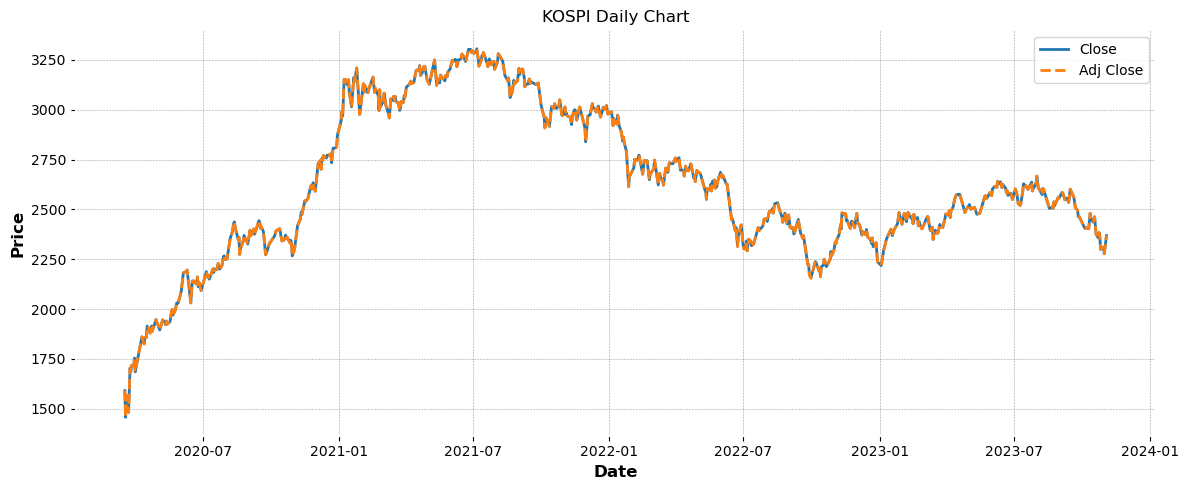

In [67]:
plt.figure(figsize=(12,5))
# 종가 데이터 그래프
plt.plot(df['Close'], label="Close")

# 조정된 종가 데이터 그래프 (Adj Close가 있다면)
if 'Adj Close' in df.columns:
    plt.plot(df['Adj Close'], label="Adj Close", linestyle="--")

plt.title("KOSPI Daily Chart")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

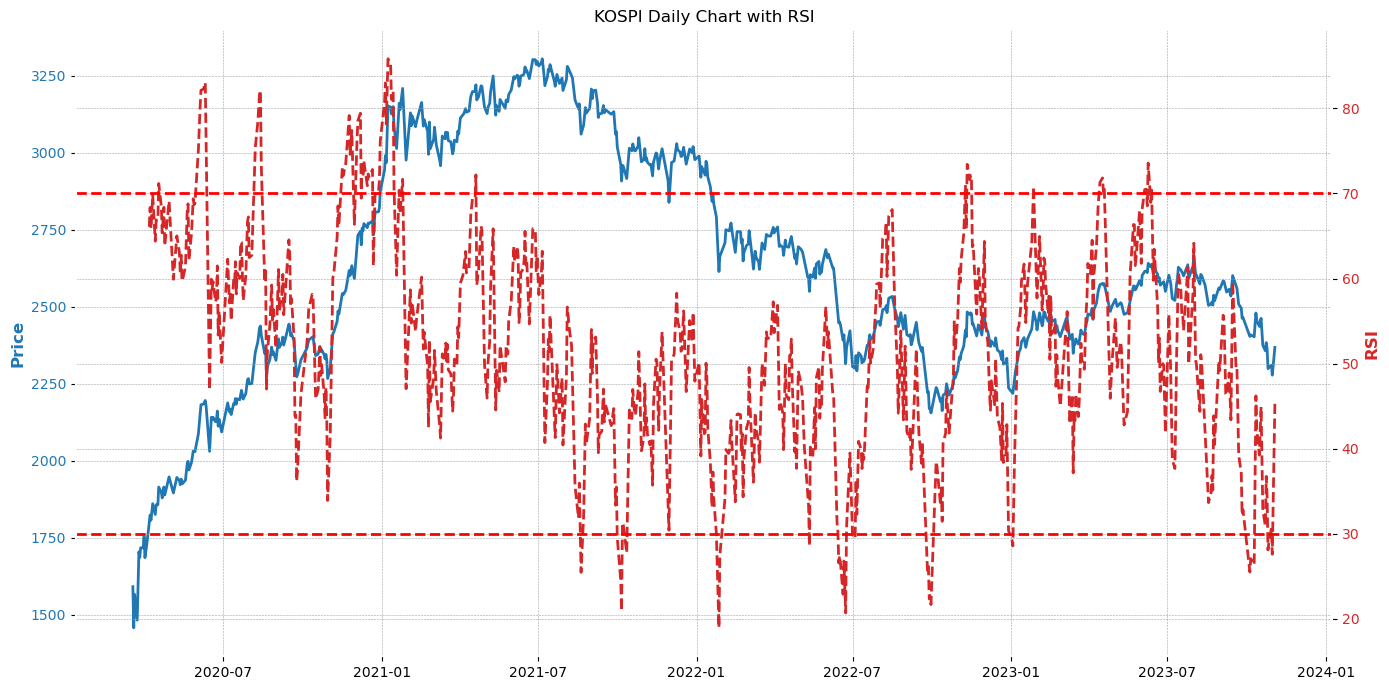

In [68]:
# RSI 계산 및 컬럼 추가
df['RSI'] = ta.momentum.RSIIndicator(df['Close'], window=14).rsi()

fig, ax1 = plt.subplots(figsize=(14, 7))

# 종가 그래프
ax1.set_ylabel('Price', color='tab:blue')
ax1.plot(df['Close'], label="Close", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  # 두 번째 y축 생성
ax2.set_ylabel('RSI', color='tab:red')
ax2.plot(df['RSI'], label="RSI", linestyle="--", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.axhline(70, color='red', linestyle='--')
ax2.axhline(30, color='red', linestyle='--')

plt.title("KOSPI Daily Chart with RSI")
plt.grid(True)
plt.tight_layout()
plt.show()

In [73]:
df['RSI'].isnull()
df['RSI'].isnull().sum()

13

In [70]:
# 가정: 'dataframe'는 pandas DataFrame이고 'column'은 그 안의 컬럼 이름입니다.
numpy_array = df[['Open','High','Low','Close','Adj Close','Volume','RSI']].to_numpy()

/Users/myeongjinlee/opt/anaconda3/lib/python3.8/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


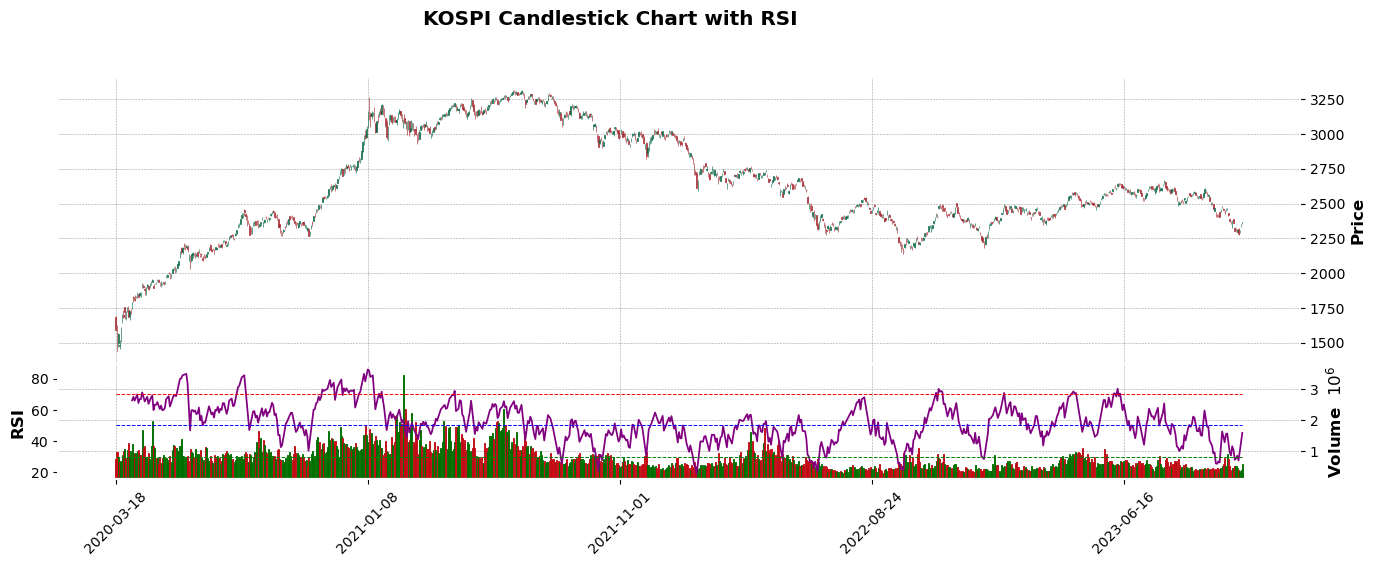

In [71]:
# RSI 계산
df['RSI'] = ta.momentum.RSIIndicator(df['Close'], window=14).rsi()

# RSI를 NumPy 배열로 변환
rsi_array = df['RSI'].to_numpy()

# 캔들스틱 차트와 RSI를 함께 그리기 위한 설정
apds = [
    mpf.make_addplot(df['RSI'].values, panel=1, color='purple', ylabel='RSI'),
    mpf.make_addplot(np.array([70]*len(df)), panel=1, color='red', linestyle='dashed', width=0.7),
    mpf.make_addplot(np.array([50]*len(df)), panel=1, color='blue', linestyle='dashed', width=0.7),
    mpf.make_addplot(np.array([30]*len(df)), panel=1, color='green', linestyle='dashed', width=0.7)
    ]

# RSI 차트에 해당하는 Axes 객체에 y축 눈금 설정
axes[1].set_yticks([30, 50, 70])  # 왜 안바뀌냐 ㅠ 

# 캔들스틱 차트 그리기
fig, axes=mpf.plot(df, type='candle', style='charles',
          addplot=apds,
          figratio=(12,4),
          volume=True, 
          title='KOSPI Candlestick Chart with RSI',
          ylabel='Price',
          returnfig=True,
          datetime_format='%Y-%m-%d') 





/Users/myeongjinlee/opt/anaconda3/lib/python3.8/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

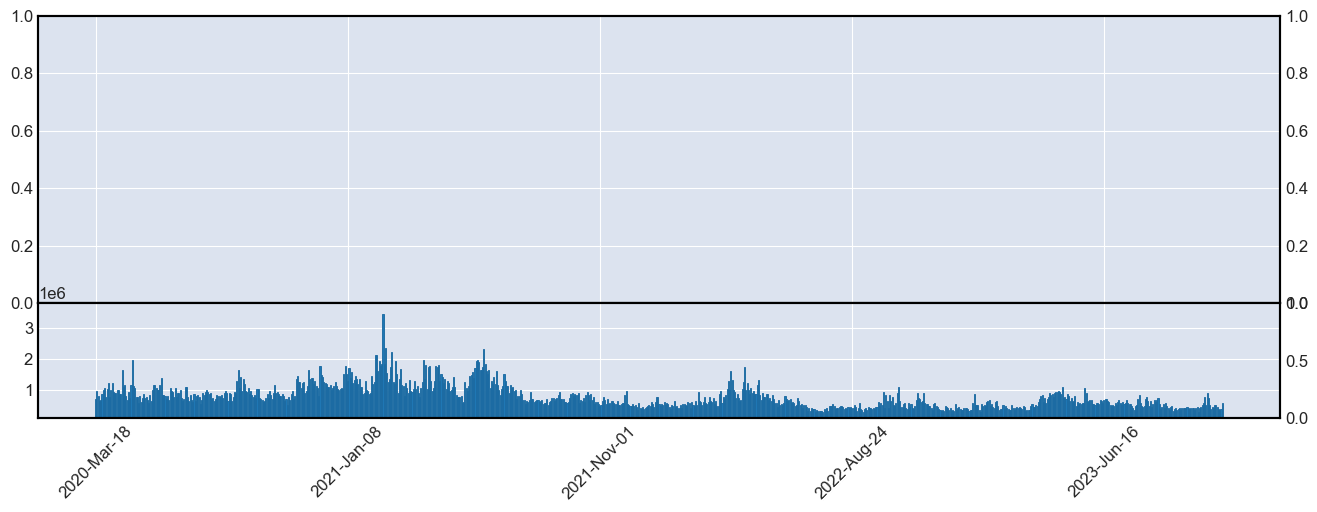

In [82]:
# 상다,하다 찾자
def find_divergences(df):
    buy_signals = []
    sell_signals = []
    lookback = 14

    for current in range(lookback, len(df)):
        local_max = df['High'][current-lookback:current].max()
        local_min = df['Low'][current-lookback:current].min()

        rsi_local_max = df['RSI'][current-lookback:current].max()
        rsi_local_min = df['RSI'][current-lookback:current].min()

        price_max_index = df['High'][current-lookback:current].idxmax()
        price_min_index = df['Low'][current-lookback:current].idxmin()

        rsi_max_index = df['RSI'][current-lookback:current].idxmax()
        rsi_min_index = df['RSI'][current-lookback:current].idxmin()

        # Bearish divergence (potential sell signal)
        if local_max < df['High'][current] and rsi_local_max > df['RSI'][current]:
            sell_signals.append(current)
        
        # Bullish divergence (potential buy signal)
        if local_min > df['Low'][current] and rsi_local_min < df['RSI'][current]:
            buy_signals.append(current)

    return buy_signals, sell_signals

# 시리즈 데이터를 NumPy 배열로 변환
df['Low'] = df['Low'].values
df['High'] = df['High'].values
df['RSI'] = df['RSI'].values

# NumPy 배열로 변환
buy_prices = df['Low'].iloc[buy_signals].values
sell_prices = df['High'].iloc[sell_signals].values

#다이버전스 호출 
buy_signals, sell_signals = find_divergences(df)



# 시그널을 차트에 표시
apds = [
        mpf.make_addplot(df['RSI'], panel=1, color='purple', ylabel='RSI'),
        mpf.make_addplot([70]*len(df), panel=1, color='red', linestyle='dashed'),
        mpf.make_addplot([30]*len(df), panel=1, color='green', linestyle='dashed')
        ]
# 공매수, 공매도 시그널을 포함하는 addplot 생성
buy_scatter = mpf.make_addplot(
    df['Low'][buy_signals], 
    type='scatter', 
    markersize=200, 
    marker='^', 
    color='blue', 
    panel=0,
    secondary_y=False
)

sell_scatter = mpf.make_addplot(
    df['High'][sell_signals], 
    type='scatter', 
    markersize=200, 
    marker='v', 
    color='orange', 
    panel=0,
    secondary_y=False
)

# 이전에 정의한 apds 리스트에 새로운 시그널 추가
apds += [buy_scatter, sell_scatter]

# 캔들스틱 차트와 RSI, 그리고 다이버전스 시그널 표시
mpf.plot(
    df, 
    type='candle', 
    addplot=apds, 
    volume=True, 
    figratio=(12,4), 
    title='Candlestick Chart with Divergence Signals'
)